#感情データのモデル作成及びテスト




90分対策  
F12を開いて以下のスクリプトをコンソールで実行  
function KeepClicking(){
console.log("Clicking");
document.querySelector("colab-connect-button").click()
}
setInterval(KeepClicking,600000)

  
10分ごとに接続

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras import layers
from keras.models import Sequential, Model,load_model
from tensorflow.keras.layers import Activation, Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
base_dir = '/content/drive/MyDrive/data分析/Face Experience/'
train_dir = os.path.join(base_dir, 'train')
valid_dir = os.path.join(base_dir, 'valid')
test_dir = os.path.join(base_dir, 'test')

In [ ]:
train_angry_dir = os.path.join(train_dir, 'angry')
train_disgust_dir = os.path.join(train_dir, 'disgust')
train_fear_dir = os.path.join(train_dir, 'fear')
train_happy_dir = os.path.join(train_dir, 'happy')
train_neutral_dir = os.path.join(train_dir, 'neutral')
train_sad_dir = os.path.join(train_dir, 'sad')
train_suprise_dir = os.path.join(train_dir, 'suprise')

valid_angry_dir = os.path.join(valid_dir, 'angry')
valid_disgust_dir = os.path.join(valid_dir, 'disgust')
valid_fear_dir = os.path.join(valid_dir, 'fear')
valid_happy_dir = os.path.join(valid_dir, 'happy')
valid_neutral_dir = os.path.join(valid_dir, 'neutral')
valid_sad_dir = os.path.join(valid_dir, 'sad')
vaild_suprise_dir = os.path.join(valid_dir, 'suprise')

test_angry_dir = os.path.join(test_dir, 'angry')
test_disgust_dir = os.path.join(test_dir, 'disgust')
test_fear_dir = os.path.join(test_dir, 'fear')
test_happy_dir = os.path.join(test_dir, 'happy')
test_neutral_dir = os.path.join(test_dir, 'neutral')
test_sad_dir = os.path.join(test_dir, 'sad')
test_suprise_dir = os.path.join(test_dir, 'suprise')


##binaryとcategoricalの違い
binaryは0か1かを判定するので2値判定するのに適している  
categoricalは多クラス分類するのに適している  
今回は2つの値を入手する必要があったためcategoricalを使用

##batch_size
ミニバッチ学習に使われるバッチのサイズ  
データの枚数で割り切れるように調整する必要がある  
データの数=batch_size*epochs

##その他
rescaleは正規化のための仕組みでRGB(0~255)で読み込まれた各画素のRGB値を0から1に収まるように正規化
  
target_sizeでサイズ調整

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (48, 48),
    batch_size = 3719,
    class_mode = 'categorical'
)

validation_generator = test_datagen.flow_from_directory(
    valid_dir,
    target_size = (48, 48),
    batch_size = 457,
    class_mode = 'categorical'
)

Found 92975 images belonging to 7 classes.
Found 17366 images belonging to 7 classes.


92975 batch_size=3719,steps=25  
17366 batch_size=457,steps=38

##モデル作成
出力層はsigmoidとsoftmax  
sigmoidは2値、softmaxは多クラスの時に使用  
softmaxを使うとどの特徴にも当てはまらないものも高い数字が出る可能性がある  
input_shape:横,縦,チャンネル数(今回はRGBなので3)  
層を深くしすぎると表現力を失い一直線になる  
Conv2D(16,(3,3)): 3*3の大きさのフィルタを16種類使用  
activation='relu': Relu関数　0より大きい場合はそのまま、0未満は0  
kernel_initializerで重みの初期化  
Relu関数の場合はheの初期値を使うといいかも?




In [ ]:
model=Sequential()
img_rows=48
img_cols=48
nb_classes=7
# 畳み込み層
model.add(Conv2D(32, (3, 3), activation='relu',input_shape=(img_rows, img_cols, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Dropout(0.2))

# 全結合層
model.add(Flatten())
model.add(Dense(128, activation='relu'))

model.add(Dropout(0.2))

# 出力層
model.add(Dense(nb_classes, activation='softmax'))
          
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 46, 46, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 23, 23, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 10, 10, 64)       

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 46, 46, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 23, 23, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 10, 10, 64)       

##Adam
MomentumとAdaGradを融合したような手法

In [ ]:
from tensorflow.keras.optimizers import Adam
adam = Adam(learning_rate=1e-4)
model.compile(optimizer=adam,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

モデルを保存　再利用するときに便利

In [ ]:
model.save('/content/drive/MyDrive/data分析/Face Experience/newfacemodel1.h5')

重みを保存　再利用するときに便利


## 補足
ハイパーパラメータチューニング

In [ ]:
# モデルと重みの読み込み
model2=load_model('/content/drive/MyDrive/data分析/Face Experience/model.hdf5')
#model2.load_weights('/content/drive/MyDrive/data分析/Face Experience/model-final.hdf5')

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size =  (48, 48),
    batch_size = 3863,
    #batch_size=309,
    class_mode = 'categorical'
)

Found 15452 images belonging to 7 classes.


4と3863
309と50

In [ ]:
test_loss, test_acc = model2.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)
print('test loss', test_loss)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


test acc: 0.6053585410118103
test loss 1.1340962648391724


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


Confusion Matrix


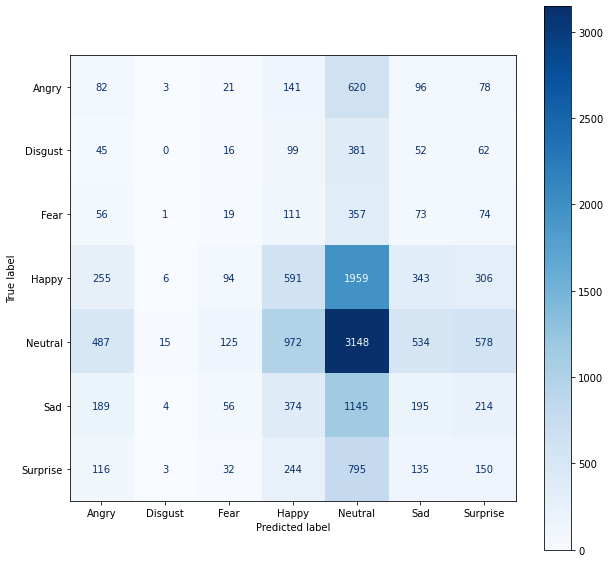

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
Y_pred = model2.predict_generator(test_generator, 4)
y_pred = np.argmax(Y_pred, axis=1)
labels = ["Angry", "Disgust", "Fear", "Happy", "Neutral", "Sad", "Surprise"]
print("Confusion Matrix")
# confusion matrixの作成
cm = confusion_matrix(test_generator.classes, y_pred)
#表示
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
fig, ax = plt.subplots(figsize=(10, 10))
cmd.plot(ax=ax, cmap="Blues")

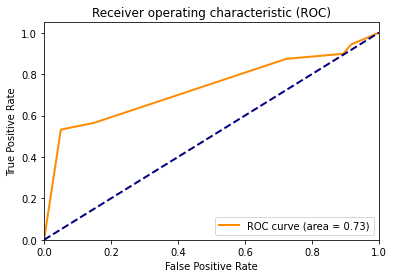

In [ ]:
from sklearn import metrics
x, y = test_generator.next()
prediction = model2.predict(x)
predict_label1 = np.argmax(prediction, axis=-1)
true_label1 = np.argmax(y, axis=-1)
y = np.array(true_label1)
scores = np.array(predict_label1)
fpr, tpr, thresholds = metrics.roc_curve(y, scores, pos_label=6)
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
 lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
import numpy as np
from sklearn import metrics
classes = ["Angry", "Disgust", "Fear", "Happy", "Neutral", "Sad", "Surprise"]
test_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_generator = test_datagen.flow_from_directory(directory=test_dir,
                                                  target_size=(48, 48),
                                                  color_mode='rgb',
                                                  class_mode='categorical',
                                                  batch_size=3863,
                                                  shuffle=False)



Found 15452 images belonging to 7 classes.


In [ ]:
#classes = ["Angry", "Disgust", "Fear", "Happy", "Neutral", "Sad", "Surprise"]
test_steps_per_Epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)
#test_steps_per_Epoch=4
predictions = model2.predict_generator(test_generator, steps=test_steps_per_Epoch)
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)
# Ground-Truthクラスとクラスラベルを取得する
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# scikit-learnを使用して統計を取得する
report = metrics.classification_report(true_classes,predicted_classes, 
                                       labels=np.arange(len(classes)),
                                       target_names=classes)
print(report)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  after removing the cwd from sys.path.


              precision    recall  f1-score   support

       Angry       0.50      0.59      0.54      1041
     Disgust       0.53      0.03      0.05       655
        Fear       0.44      0.23      0.30       691
       Happy       0.81      0.58      0.67      3554
     Neutral       0.60      0.86      0.70      5859
         Sad       0.47      0.31      0.37      2177
    Surprise       0.57      0.56      0.57      1475

    accuracy                           0.61     15452
   macro avg       0.56      0.45      0.46     15452
weighted avg       0.61      0.61      0.58     15452

